<a href="https://colab.research.google.com/github/Mustas5/Hackathon-Mano-Mano/blob/main/ManoMano_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import ressources and datatables

Timeseries: 
- https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
- https://www.statsmodels.org/dev/tsa.html

In [96]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


## The 4 table

In [102]:
aug = pd.read_csv('/content/drive/MyDrive/2022-01 Wild Code School x ManoMano_ CES Data Set - August 2021 (1).csv')
sep = pd.read_csv('/content/drive/MyDrive/2022-01 Wild Code School x ManoMano_ CES Data Set - September 2021.csv')
oct = pd.read_csv('/content/drive/MyDrive/2022-01 Wild Code School x ManoMano_ CES Data Set - October 2021.csv')
nov = pd.read_csv('/content/drive/MyDrive/2022-01 Wild Code School x ManoMano_ CES Data Set - November 2021.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Into one df, with some chosen columns

In [ ]:
# score,
# created at,
# day
# month
# device
# family
# first_order
# nb_articles
# bv_transaction
# payment_method

In [103]:
aug = aug[["id", "score", "created_at", "date", "day", "month", "device", "family", "first_order", "nb_articles", "bv_transaction", "payment_method"]]

In [104]:
sep = sep[["id", "score", "created_at", "date", "day", "month", "device", "family", "first_order", "nb_articles", "bv_transaction", "payment_method"]]

In [105]:
oct = oct[["id", "score", "created_at", "date", "day", "month", "device", "family", "first_order", "nb_articles", "bv_transaction", "payment_method"]]

In [106]:
nov = nov[["id", "score", "created_at", "date", "day", "month", "device", "family", "first_order", "nb_articles", "bv_transaction", "payment_method"]]

In [107]:
df = pd.concat([aug , sep, oct, nov], ignore_index = True)

# Exploring August data

In [ ]:
aug.info()

In [10]:
aug.head()

,id,comment,original_comment,score,data_scale,data_source,created_at,date,day,month,is_mf,device,family,is_b2b,reason,browser,category,language,platform,provider,first_order,nb_articles,csat_presales,shipping_fees,bv_transaction,payment_method,operating_system,last_paid_channel,has_presales_contact,shipping_fees_bucket,bv_transaction_bucket,has_manodvisor_contact,themes,tags
0,295564331,NaN,NaN,10,NPS,Customer Effort Score,2021-08-01T00:02:13.000Z,2021-08-01,Sunday,August,False,phone,Mobilier d'intérieur,False,NaN,Google 170.0.386351093,Meuble de salle à manger,Unknown,GB,Deuba (GB),True,1,FALSE,0.00,119.95,paypal,iOS 14.6,SHOPBOT,False,0,101 - 150,False,NaN,NaN
1,295563489,NaN,NaN,10,NPS,Customer Effort Score,2021-08-01T00:04:10.000Z,2021-08-01,Sunday,August,False,desktop,Mobilier d'intérieur,False,NaN,Chrome 92.0.4515,Meuble de bureau,Unknown,GB,Songmics (GB),True,1,FALSE,0.00,99.99,mastercard,Windows 10,SHOPBOT,False,0,1 - 100,False,NaN,NaN
2,295564358,NaN,NaN,8,NPS,Customer Effort Score,2021-08-01T00:15:48.000Z,2021-08-01,Sunday,August,False,desktop,Mobilier d'intérieur,False,NaN,Chrome 92.0.4515,Meuble de salle à manger,Unknown,FR,vidaXL (FR),True,1,FALSE,0.00,84.99,visa,Windows 10,AFFILIATION,False,0,1 - 100,False,NaN,NaN
3,295563988,NaN,NaN,5,NPS,Customer Effort Score,2021-08-01T02:04:17.000Z,2021-08-01,Sunday,August,False,phone,Jardin piscine,False,I had trouble signing up or logging in,Mobile Safari 14.1,Mobilier de jardin et jeux,Unknown,GB,Agito UK (GB),True,1,FALSE,0.00,92.99,visa,iOS 14.5.1,SHOPBOT,False,0,1 - 100,False,NaN,Detractor '- Signup/Login
4,295562040,NaN,NaN,10,NPS,Customer Effort Score,2021-08-01T02:38:07.000Z,2021-08-01,Sunday,August,False,desktop,Plomberie chauffage,False,NaN,Chrome 92.0.4515,Chauffage et climatisation,Unknown,FR,Ecoland's (FR),False,1,FALSE,1.92,8.30,paypal,Windows 10,SEM,False,1 - 5,1 - 100,False,NaN,NaN


In [9]:
aug.corr()

,id,score,is_mf,first_order,nb_articles,shipping_fees,bv_transaction,has_presales_contact,has_manodvisor_contact
id,1.000000,-0.004538,-0.005740,-0.006061,0.001986,-0.001307,-0.011500,0.006220,-0.001768
score,-0.004538,1.000000,0.014883,-0.005358,-0.063332,-0.056941,-0.030272,-0.035862,-0.002591
is_mf,-0.005740,0.014883,1.000000,-0.054912,0.097231,-0.031474,0.055429,-0.001969,0.003827
first_order,-0.006061,-0.005358,-0.054912,1.000000,-0.060779,-0.068917,0.020271,-0.004697,-0.010392
nb_articles,0.001986,-0.063332,0.097231,-0.060779,1.000000,0.283180,0.331607,0.032010,-0.003737
shipping_fees,-0.001307,-0.056941,-0.031474,-0.068917,0.283180,1.000000,0.281815,0.041438,0.002044
bv_transaction,-0.011500,-0.030272,0.055429,0.020271,0.331607,0.281815,1.000000,0.096025,0.051063
has_presales_contact,0.006220,-0.035862,-0.001969,-0.004697,0.032010,0.041438,0.096025,1.000000,0.062635
has_manodvisor_contact,-0.001768,-0.002591,0.003827,-0.010392,-0.003737,0.002044,0.051063,0.062635,1.000000


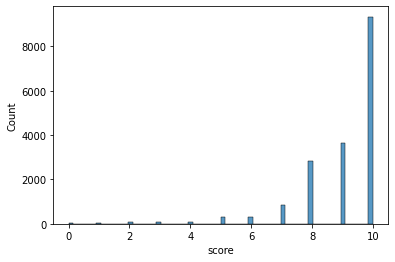

In [12]:
sns.histplot(aug["score"])

In [13]:
aug["data_scale"].value_counts()

NPS    17652
Name: data_scale, dtype: int64

In [14]:
aug['day'].value_counts()

Monday       3669
Sunday       3101
Wednesday    2572
Thursday     2552
Friday       2215
Saturday     2009
Tuesday      1534
Name: day, dtype: int64

In [15]:
aug["device"].value_counts()

desktop    11167
phone       5013
tablet      1472
Name: device, dtype: int64

In [16]:
aug["provider"].value_counts()

vidaXL (FR)                        495
WilTec (FR)                        381
Aosom (GB)                         287
ID Market (FR)                     283
Made4home (FR)                     245
                                  ... 
NANWEI MF (FR)                       1
Egregore (FR)                        1
Dancover (FR)                        1
Hortum (ES)                          1
Befestigungstechnik-online (FR)      1
Name: provider, Length: 2165, dtype: int64

In [17]:
aug["first_order"].value_counts()

False    9688
True     7964
Name: first_order, dtype: int64

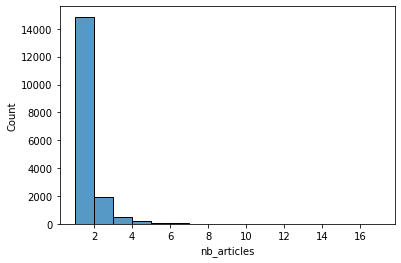

In [18]:
sns.histplot(aug["nb_articles"])

In [19]:
aug['payment_method'].value_counts()

visa                7239
mastercard          4992
paypal              4985
oney3x               245
transfer             103
payment-intent        39
sofort                33
cb                    15
deferred-payment       1
Name: payment_method, dtype: int64

In [20]:
aug['themes'].value_counts()

Service > General Satisfaction > 1                                                                                                           484
Online Experience > Ease of Use > 1                                                                                                          451
Other > Miscellaneous > 0                                                                                                                    128
Delivery > Speed of delivery > 1;Online Experience > Ease of Use > 1                                                                         101
Delivery > Speed of delivery > 0                                                                                                              85
                                                                                                                                            ... 
Delivery > Drop-off point > -1;Online Experience > Ease of Use > 1                                                                

In [23]:
aug[(aug["themes"].notna()) & aug['comment'].notna()]

,id,comment,original_comment,score,data_scale,data_source,created_at,date,day,month,is_mf,device,family,is_b2b,reason,browser,category,language,platform,provider,first_order,nb_articles,csat_presales,shipping_fees,bv_transaction,payment_method,operating_system,last_paid_channel,has_presales_contact,shipping_fees_bucket,bv_transaction_bucket,has_manodvisor_contact,themes,tags
15,295562096,Clear and accurate... thank you.,Clair et précis..... merci,10,NPS,Customer Effort Score,2021-08-01T06:05:11.000Z,2021-08-01,Sunday,August,False,phone,Jardin piscine,False,NaN,Chrome Mobile 92.0.4515,Barbecue et plancha,French,FR,vidaXL (FR),False,2,FALSE,0.00,102.49,visa,Android 8.0.0,SEM,False,0,101 - 150,False,Delivery > Order Accuracy > 1;Online Experienc...,NaN
23,295562415,All right.,Très bien,9,NPS,Customer Effort Score,2021-08-01T06:33:25.000Z,2021-08-01,Sunday,August,False,desktop,Jardin piscine,False,NaN,Edge 92.0.902,Matériel d'arrosage et récupérateurs d'eau,French,FR,Multitanks (FR),False,1,FALSE,0.00,44.55,paypal,Windows 10,SHOPBOT,False,0,1 - 100,False,Service > General Satisfaction > 1,NaN
24,295563199,All right.,trés bien,9,NPS,Customer Effort Score,2021-08-01T06:34:44.000Z,2021-08-01,Sunday,August,False,desktop,Construction matériaux,False,NaN,Edge 92.0.902,"Toiture, gouttière et bardage",French,FR,Briday FR (FR),False,1,FALSE,0.00,24.89,paypal,Windows 10,SHOPBOT,False,0,1 - 100,False,Service > General Satisfaction > 1,NaN
36,295562240,First class service. Have a gold medal.,First class service. Have a gold medal.,10,NPS,Customer Effort Score,2021-08-01T07:09:21.000Z,2021-08-01,Sunday,August,False,desktop,Plomberie chauffage,False,NaN,Firefox 89.0,Chauffage et climatisation,English,GB,DIRECT2PUBLIK LTD (GB),False,1,FALSE,0.00,17.95,paypal,Mac OS X 10.13,EMAIL,False,0,1 - 100,False,Service > General Satisfaction > 1,NaN
39,295562144,Perfect except 2 sends different for an order,Parfait sauf 2 envoie différent pour une commande,9,NPS,Customer Effort Score,2021-08-01T07:19:17.000Z,2021-08-01,Sunday,August,True,tablet,Plomberie chauffage,False,NaN,Chrome 92.0.4515,Robinetterie,French,FR,Silamp (FR),False,2,FALSE,0.00,101.78,visa,Android 11,SEM,False,0,101 - 150,False,Service > General Satisfaction > 1;Delivery > ...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17614,310115290,Super metric mano,Super mano mètrique,10,NPS,Customer Effort Score,2021-08-30T20:40:58.000Z,2021-08-30,Monday,August,False,phone,Outillage,False,NaN,Chrome Mobile 91.0.4472,Matériel et aménagement de l'atelier,French,FR,Maxter Accessoires (FR),False,1,FALSE,6.90,41.80,mastercard,Android 7.1.1,SHOPBOT,False,6 - 10,1 - 100,False,Service > General Satisfaction > 1,NaN
17616,310118279,"All super fast: easy to understand, easy to pa...","Todo super rápido: fácil de entender, fácil d...",10,NPS,Customer Effort Score,2021-08-30T20:44:08.000Z,2021-08-30,Monday,August,False,phone,Quincaillerie,False,NaN,Chrome Mobile 92.0.4515,Quincaillerie de porte et de fenêtre,Spanish,ES,Neoferr (ES),False,2,FALSE,2.95,128.92,paypal,Android 10,DIRECT_ACCESS,False,1 - 5,101 - 150,False,Online Experience > Ease of Use > 1;Online Exp...,NaN
17623,310117826,Good evening I had trouble paying by card but ...,Bonsoir j'ai eu des soucis pour payer par cart...,4,NPS,Customer Effort Score,2021-08-30T20:53:10.000Z,2021-08-30,Monday,August,False,phone,Jardin piscine,False,J'ai eu des difficultés à payer avec les moyen...,Chrome Mobile 92.0.4515,Mobilier de jardin et jeux,French,FR,SkyLantern (FR),False,1,FALSE,15.30,57.25,visa,Android 8.0.0,SEM,False,11 - 20,1 - 100,False,Payments > Payment Methods > -1;Payments > Suc...,Detractor '- Difficulty Paying
17632,310118360,All right.,Très bien,10,NPS,Customer Effort Score,2021-08-30T21:14:36.000Z,2021-08-30,Monday,August,False,phone,Jardin piscine,False,NaN,Mobile Safari 14.1.2,Mobilier de jardin et jeux,French,FR,Sunny Inch (FR),True,1,FALSE,0.00,477

In [24]:
aug['category'].value_counts()

Mobilier de jardin et jeux              1516
Outils de jardin motorisés              1244
Matériel et aménagement de l'atelier     869
Meuble de salon                          605
Piscine                                  539
                                        ... 
Réseaux                                    3
Linge de maison                            3
Cuisine complète et kitchenette            2
Préparation des supports                   2
Cuisine et accessoire                      1
Name: category, Length: 99, dtype: int64

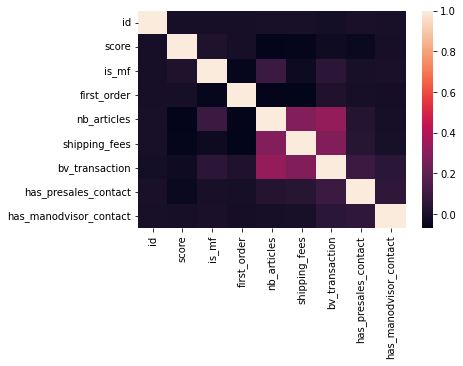

In [26]:
sns.heatmap(aug.corr())

In [28]:
aug.columns

Index(['id', 'comment', 'original_comment', 'score', 'data_scale',
       'data_source', 'created_at', 'date', 'day', 'month', 'is_mf', 'device',
       'family', 'is_b2b', 'reason', 'browser', 'category', 'language',
       'platform', 'provider', 'first_order', 'nb_articles', 'csat_presales',
       'shipping_fees', 'bv_transaction', 'payment_method', 'operating_system',
       'last_paid_channel', 'has_presales_contact', 'shipping_fees_bucket',
       'bv_transaction_bucket', 'has_manodvisor_contact', 'themes', 'tags'],
      dtype='object')

In [ ]:
aug = pd.concat([aug, aug['genres'].str.get_dummies()], axis = 1)

In [41]:
def dummy_columns(df, col):
  df = pd.concat([df, df[col].str.get_dummies()], axis = 1)
  return df

In [ ]:
dummy_columns(aug, 'device')
dummy_columns(aug, 'language')
dummy_columns(aug, 'platform')

In [ ]:
aug['device']
aug['language']
aug['platform']
#aug['provider']
#first_order factorize

In [44]:
aug = pd.concat([aug, aug['device'].str.get_dummies()], axis = 1)

In [46]:
aug = pd.concat([aug, aug['language'].str.get_dummies()], axis = 1)

In [48]:
aug = pd.concat([aug, aug['platform'].str.get_dummies()], axis = 1)

In [35]:
aug['first_order'] = aug['first_order'].apply(lambda x: 0 if x == True else 1)

In [49]:
aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17652 entries, 0 to 17651
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      17652 non-null  int64  
 1   comment                 3206 non-null   object 
 2   original_comment        3495 non-null   object 
 3   score                   17652 non-null  int64  
 4   data_scale              17652 non-null  object 
 5   data_source             17652 non-null  object 
 6   created_at              17652 non-null  object 
 7   date                    17652 non-null  object 
 8   day                     17652 non-null  object 
 9   month                   17652 non-null  object 
 10  is_mf                   17652 non-null  bool   
 11  device                  17652 non-null  object 
 12  family                  17651 non-null  object 
 13  is_b2b                  17644 non-null  object 
 14  reason                  675 non-null  

In [ ]:
aug.corr()

In [ ]:
print(np.sum(aug.corr() > 0.3))
print(np.sum(aug.corr() < -0.25))


In [ ]:
sns.set(rc={'figure.figsize':(12,6)})
sns.heatmap(aug.corr(),
            center = 0,                                     # Centering
            cmap = sns.color_palette("vlag", as_cmap=True), # Divergent colormap
            #annot = True                                   # Would print also the values, however the fig with this size would be still to dense
            )
plt.title("Heatmap for correlation among dataframe columns")
plt.show()

## Transforming date to datetime and setting it as index

In [ ]:
# 
aug['date'] = pd.to_datetime(aug['date'])
aug.set_index('date', inplace=True)
aug.sort_index(inplace=True)
aug.head()

## Checking August as timeseries

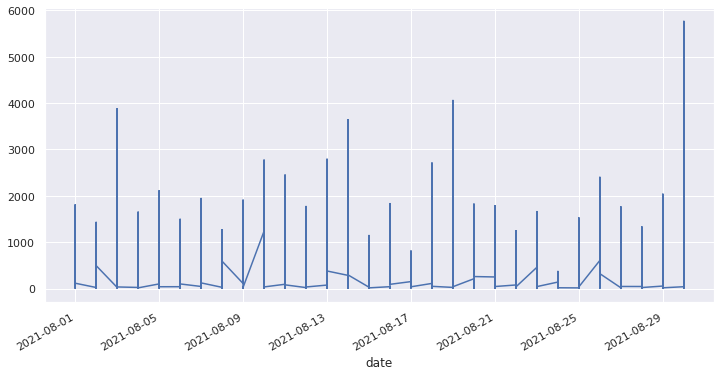

In [97]:
aug['bv_transaction'].plot()
plt.show()

In [70]:
aug_price = aug['bv_transaction']
type(aug_price)

pandas.core.series.Series

In [ ]:
series = read_csv('airline-passengers.csv', header=0, index_col=0)
result = seasonal_decompose(series, model='multiplicative')

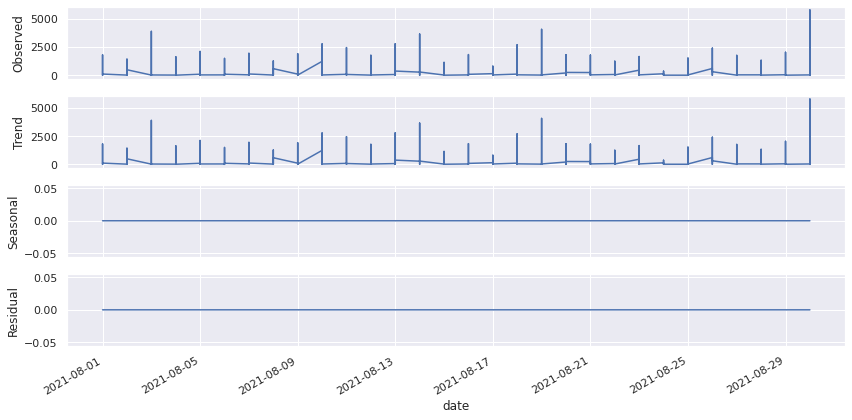

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(x = aug_price, model='additive', freq = 1)
result.plot()
plt.show()

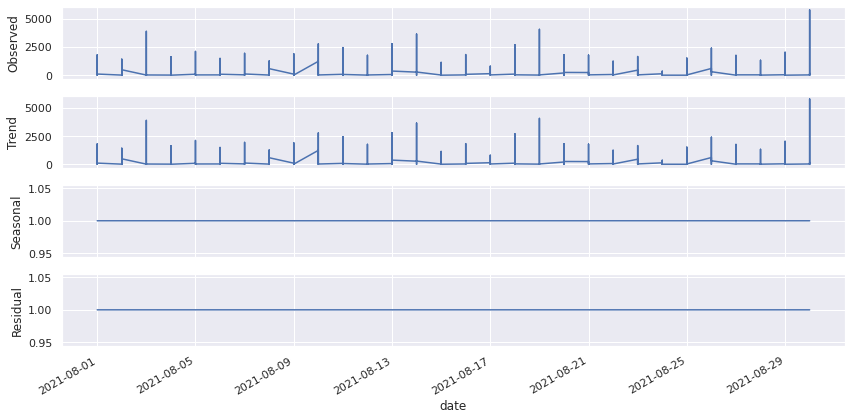

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(x = aug_price, model='multiplicative', freq = 1)
result.plot()
plt.show()

# Proceeding with timeseries on whole dataset

- Hour of day
- Day of month
- Weekly
- Monthly
- Yearly

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95182 entries, 0 to 95181
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              95182 non-null  int64  
 1   score           95182 non-null  int64  
 2   created_at      95182 non-null  object 
 3   day             95182 non-null  object 
 4   month           95182 non-null  object 
 5   device          95182 non-null  object 
 6   family          95176 non-null  object 
 7   first_order     95182 non-null  int64  
 8   nb_articles     95182 non-null  int64  
 9   bv_transaction  95182 non-null  float64
 10  payment_method  95182 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 8.0+ MB


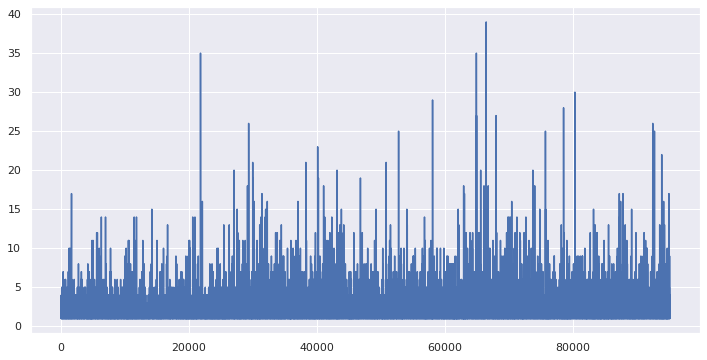

In [95]:
df["nb_articles"].plot()

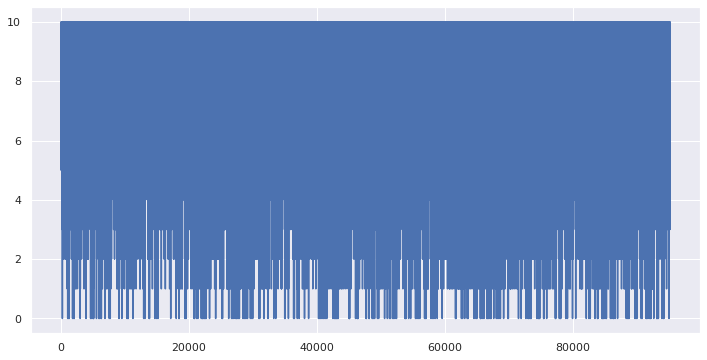

In [92]:
df['score'].plot()

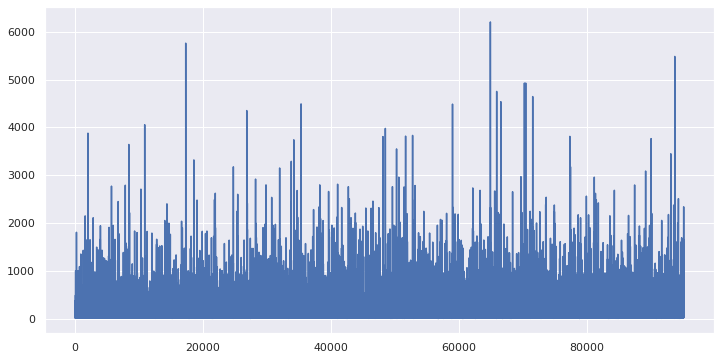

In [91]:
df['bv_transaction'].plot()

## First date to datetime and set as index

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95182 entries, 0 to 95181
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              95182 non-null  int64  
 1   score           95182 non-null  int64  
 2   created_at      95182 non-null  object 
 3   date            95182 non-null  object 
 4   day             95182 non-null  object 
 5   month           95182 non-null  object 
 6   device          95182 non-null  object 
 7   family          95176 non-null  object 
 8   first_order     95182 non-null  bool   
 9   nb_articles     95182 non-null  int64  
 10  bv_transaction  95182 non-null  float64
 11  payment_method  95182 non-null  object 
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 8.1+ MB


In [109]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
df.head()

,id,score,created_at,day,month,device,family,first_order,nb_articles,bv_transaction,payment_method
date,,,,,,,,,,,
2021-08-01,295564331,10,2021-08-01T00:02:13.000Z,Sunday,August,phone,Mobilier d'intérieur,True,1,119.95,paypal
2021-08-01,295563489,10,2021-08-01T00:04:10.000Z,Sunday,August,desktop,Mobilier d'intérieur,True,1,99.99,mastercard
2021-08-01,295564358,8,2021-08-01T00:15:48.000Z,Sunday,August,desktop,Mobilier d'intérieur,True,1,84.99,visa
2021-08-01,295563988,5,2021-08-01T02:04:17.000Z,Sunday,August,phone,Jardin piscine,True,1,92.99,visa
2021-08-01,295562040,10,2021-08-01T02:38:07.000Z,Sunday,August,desktop,Plomberie chauffage,False,1,8.30,paypal


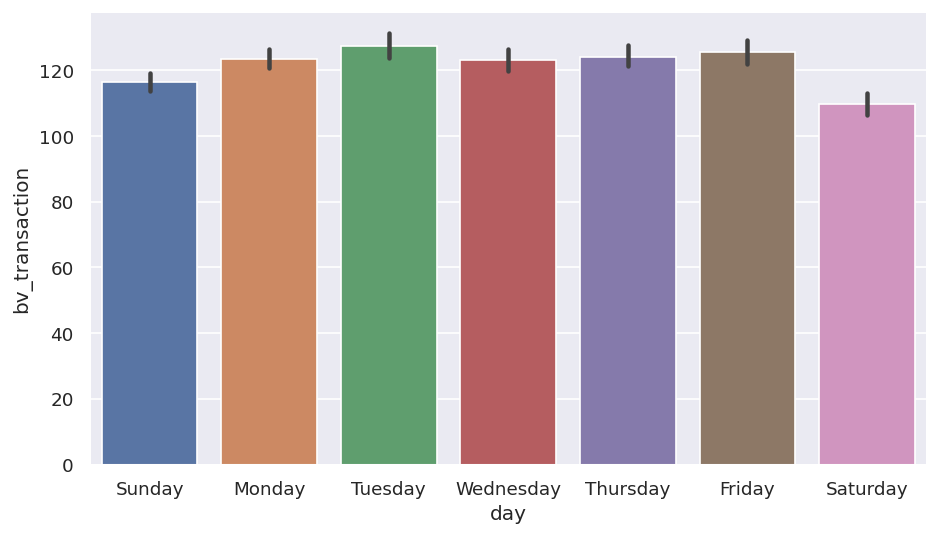

In [211]:
sns.barplot(data = df, 
            x = 'day',
            y = df["bv_transaction"])

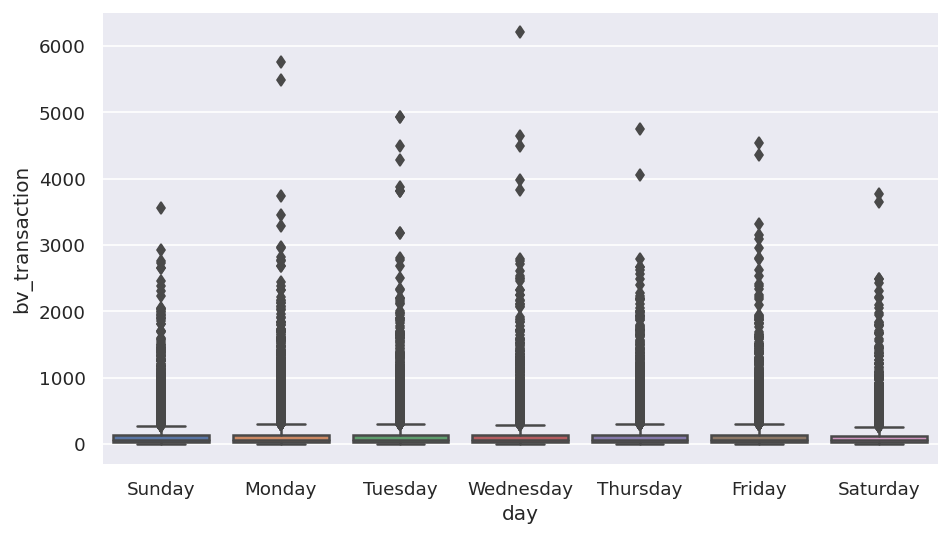

In [210]:
sns.boxplot(data = df, 
            x = "day", 
            y = df["bv_transaction"])

In [183]:
df['created_at'] = pd.to_datetime(df['created_at'])
df2 = df.set_index('created_at')

In [110]:
df_price = df['bv_transaction']

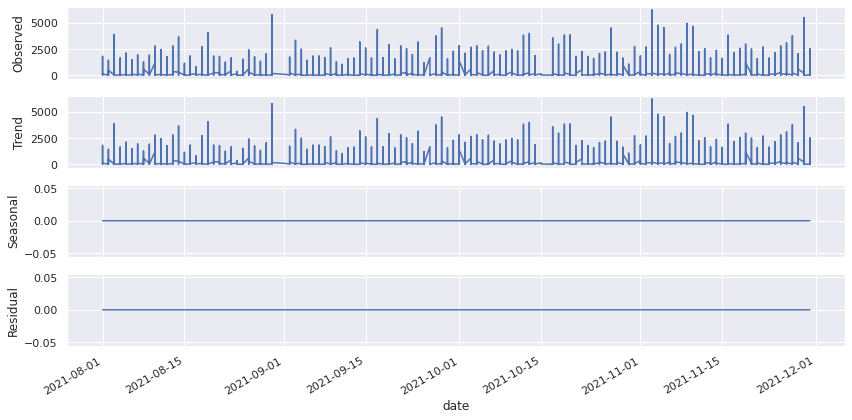

In [116]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(x = df_price, model='additive', freq = 1)
result.plot()
plt.show()

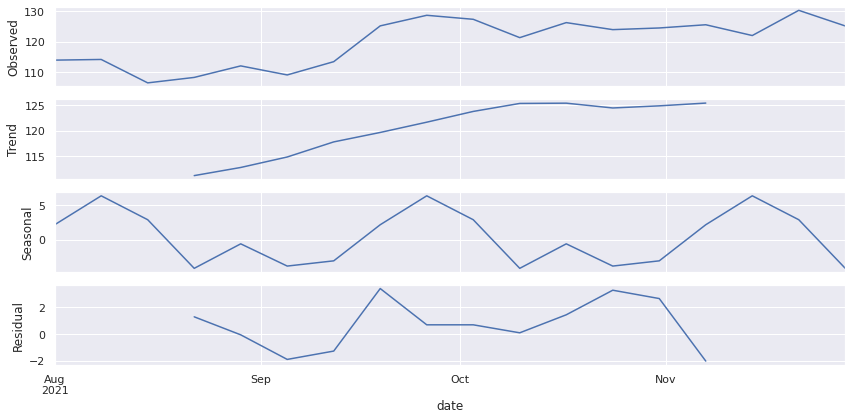

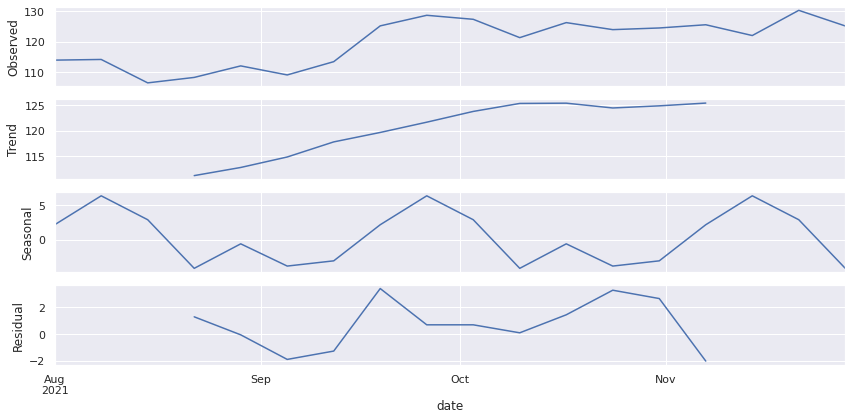

In [149]:
data2decompose = df['bv_transaction'].resample('7d').mean().copy()
seasonal_decompose(data2decompose, model = 'additive', freq = 7).plot() 

In [128]:
?seasonal_decompose

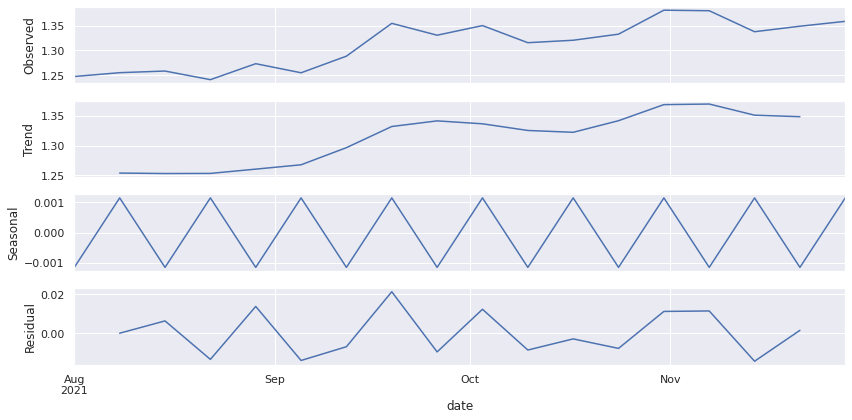

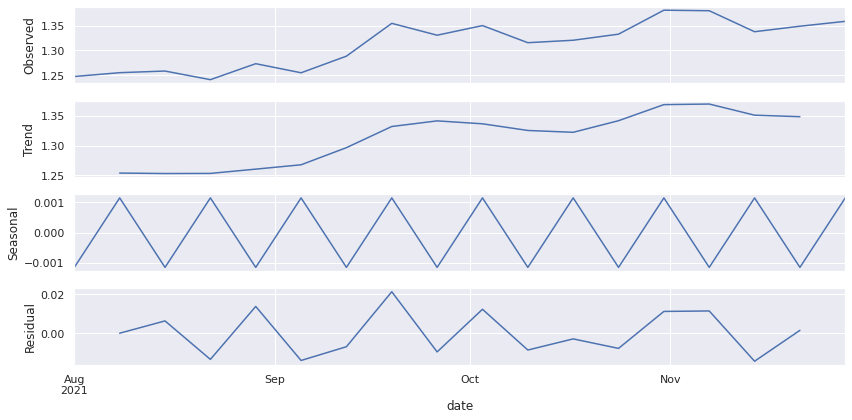

In [143]:
data2decompose2 = df['nb_articles'].resample('7d').mean().copy()
seasonal_decompose(data2decompose2, model = 'additive', freq = 2).plot() 

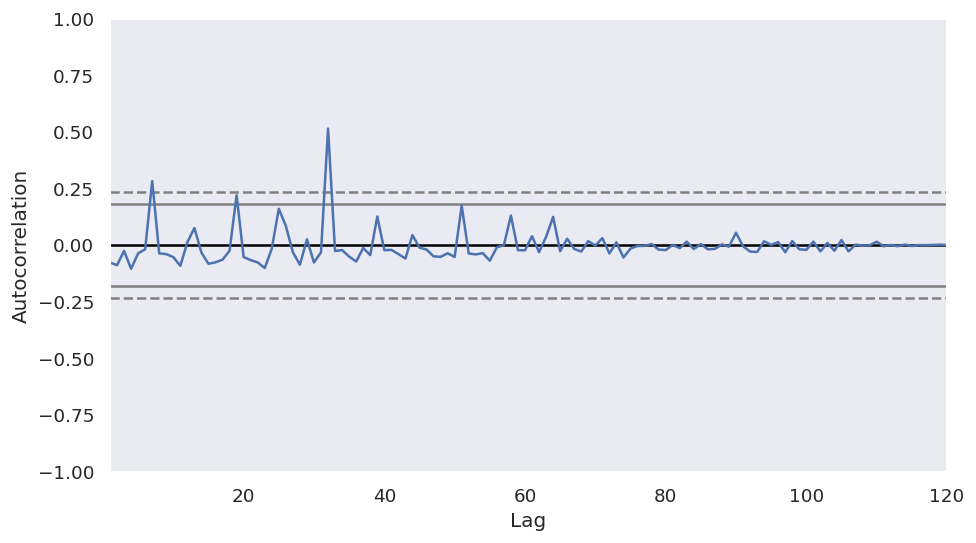

In [161]:
from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df_price[:120].tolist())

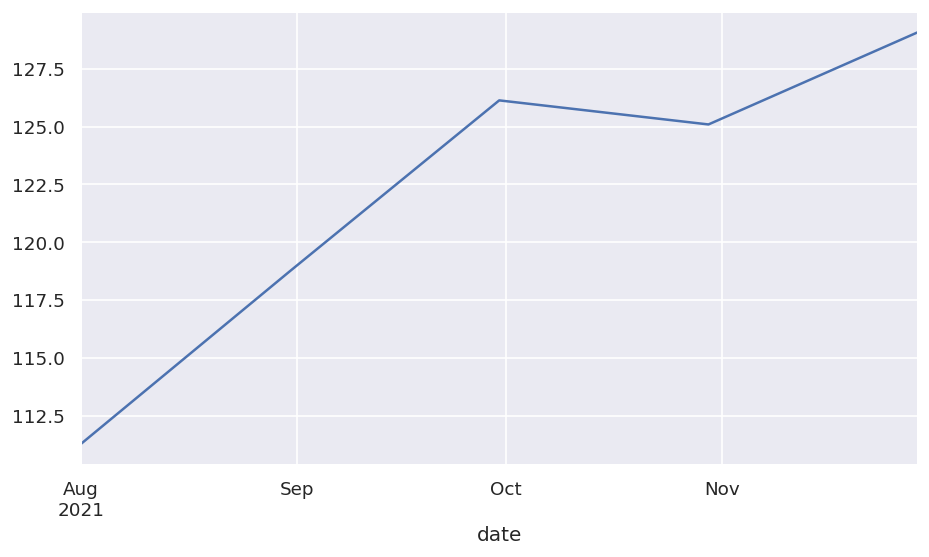

In [181]:
df['bv_transaction'].resample('30d').mean().plot()

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95182 entries, 2021-08-01 to 2021-11-30
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              95182 non-null  int64              
 1   score           95182 non-null  int64              
 2   created_at      95182 non-null  datetime64[ns, UTC]
 3   day             95182 non-null  object             
 4   month           95182 non-null  object             
 5   device          95182 non-null  object             
 6   family          95176 non-null  object             
 7   first_order     95182 non-null  bool               
 8   nb_articles     95182 non-null  int64              
 9   bv_transaction  95182 non-null  float64            
 10  payment_method  95182 non-null  object             
dtypes: bool(1), datetime64[ns, UTC](1), float64(1), int64(3), object(5)
memory usage: 8.1+ MB


In [212]:
df.to_csv('/content/drive/MyDrive/mano.csv')

In [213]:
df.columns

Index(['id', 'score', 'created_at', 'day', 'month', 'device', 'family',
       'first_order', 'nb_articles', 'bv_transaction', 'payment_method'],
      dtype='object')